# Análisis exploratorio de datos (EDA) de Sistema de bicicletas compartidas - 2011

<img src='./img/descarga.png' width='800px' height='100px'>

## Introducción

En este proyecto realizaremos un análisis exploratorio de datos utilizando Python, utilizando información de la biblioteca de datos UC Irvine Machine Learning Repository sobre el sistema de bicicletas compartidas del año 2011, que incluye información sobre la temperatura, fechas y tipo de clientes.

## Objetivos

Estudiar el comportamiento de los clientes en relación a  las estaciones del año. Se buscará a través del análisis estadístico un comportamiento anual de parte del cliente para lograr un trabajo más óptimo.

## Hipótesis

**Hipótesis 1**:
Existe una diferencia significativa en el uso promedio de bicicletas entre estaciones cálidas (primavera y verano) y estaciones frías (invierno y otoño).

**Hipótesis 2**:
Existe una diferencia en el promedio de uso entre las estaciones cálidas.

**Hipótesis 3**:
Existe una diferencia en el promedio de uso entre las estaciones frías.

**Hipótesis 4**:
¿Cómo se manifiesta el comportamiento por tipo de clientes durante la temporada de mayor actividad?

**Hipótesis 5**:
¿Cómo se refleja el comportamiento por tipo de clientes durante la temporada de menor actividad?

**Hipótesis 6**:
¿Cómo varía el uso promedio de bicicletas mensualmente durante la temporada de mayor actividad?

**Hipótesis 7**:
¿Cómo varía el uso promedio de bicicletas mensualmente durante la temporada de menor actividad?

**Hipótesis 8**:
¿Cómo se comporta el uso promedio de bicicletas por tipo de clientes durante los días de la semana de nuestra temporada de mayor frecuencia?

**Hipótesis 9**:
¿Cómo se comporta el uso promedio de bicicletas por tipo de clientes durante los días de la semana de nuestra temporada de mayor frecuencia?

## Imporatción de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#VARIABLES

ALPHA = 0.05

## Importación de Dataset

In [2]:
df2011 = pd.read_csv('data/Dataset_clear_2011.csv')


### Información del DataFrame

1. **instant**: índice del registro.
   - Este campo simplemente contiene un número de índice que identifica cada registro en el conjunto de datos.

2. **dteday**: fecha.
   - Este campo almacena la fecha en la que se registró la información.

3. **season**: estación (1: invierno, 2: primavera, 3: verano, 4: otoño).
   -  Indica la estación del año en la que se registraron los datos, con valores numéricos que corresponden a las estaciones.

4. **yr**: año (0: 2011, 1: 2012).
   - Representa el año en el que se registraron los datos, donde "0" se refiere a 2011 y "1" a 2012.

5. **mnth**: mes (1 a 12).
   - Indica el mes en el que se registraron los datos, con valores numéricos del 1 al 12 correspondientes a los meses.

6. **hr**: hora (0 a 23).
   - Muestra la hora del día en la que se registraron los datos, en formato de 24 horas (0 a 23).

7. **holiday**: día festivo (si el día es festivo o no).
   - Indica si el día en cuestión es un día festivo ("1" si lo es y "0" si no lo es). La información se extrae de un calendario de festivos.

8. **weekday**: día de la semana (0 a 6).
   - Representa el día de la semana en el que se registraron los datos.

9. **workingday**: si el día es laborable (1 si el día no es fin de semana ni festivo, de lo contrario 0).
   - Indica si el día es laborable (día hábil) con un valor de "1" si no es un fin de semana ni un día festivo, y "0" en caso contrario.

10. **weathersit**: situación meteorológica en el momento de la observación, con valores numéricos que representan diferentes condiciones climáticas.

    1. Despejado, Pocas nubes.

    2. Niebla + Pocas nubes, Niebla.

    3. Lluvia ligera, presencia de Tormenta.

    4. Lluvia intensa + Granizo + Tormenta.

11. **temp**: temperatura normalizada en Celsius.
    - La temperatura se encuentra normalizada y se expresa en grados Celsius. Los valores se han ajustado y se dividen entre 41, donde 41 es la temperatura máxima posible.

12. **atemp**: sensación térmica normalizada en Celsius.
    - Al igual que la temperatura, la sensación térmica se encuentra normalizada y se expresa en grados Celsius. Los valores se han ajustado y se dividen entre 50, donde 50 es la sensación térmica máxima posible.

13. **hum**: humedad normalizada.
    - La humedad se encuentra normalizada y los valores se dividen entre 100, donde 100 representa la humedad máxima posible.

14. **windspeed**: velocidad del viento normalizada.
    - La velocidad del viento se encuentra normalizada y los valores se dividen entre 67, donde 67 es la velocidad máxima posible del viento.

15. **casual**: conteo de usuarios casuales.
    - Muestra la cantidad de usuarios que alquilaron bicicletas de forma casual.

16. **registered**: conteo de usuarios registrados.
    - Indica la cantidad de usuarios que están registrados en el sistema y alquilaron bicicletas.

17. **cnt**: conteo total de bicicletas alquiladas, incluyendo usuarios casuales y registrados.
    - Representa el total de bicicletas alquiladas en un período determinado, incluyendo tanto a usuarios casuales como a usuarios registrados.


*****


## Análisis de datos

#### Información general

In [3]:
df2011 = pd.read_csv('./data/Dataset_clear_2011.csv',index_col='instant',parse_dates=['dteday'])
df2011.head()

,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,1,1,0,5,0,0,10.0,14.0,81.0,1,0.0,3,13,16
2,2011-01-01,1,1,1,1,5,0,0,9.0,14.0,80.0,1,0.0,8,32,40
3,2011-01-01,1,1,1,2,5,0,0,9.0,14.0,80.0,1,0.0,5,27,32
4,2011-01-01,1,1,1,3,5,0,0,10.0,14.0,75.0,1,0.0,3,10,13
5,2011-01-01,1,1,1,4,5,0,0,10.0,14.0,75.0,1,0.0,0,1,1


In [4]:
df2011.shape

(8645, 16)

In [5]:
df2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8645 entries, 1 to 8645
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dteday             8645 non-null   datetime64[ns]
 1   season             8645 non-null   int64         
 2   mnth               8645 non-null   int64         
 3   day                8645 non-null   int64         
 4   hr                 8645 non-null   int64         
 5   weekday            8645 non-null   int64         
 6   holiday            8645 non-null   int64         
 7   workingday         8645 non-null   int64         
 8   temperature        8645 non-null   float64       
 9   thermal_sensation  8645 non-null   float64       
 10  humidity           8645 non-null   float64       
 11  weathersit         8645 non-null   int64         
 12  wind_speed         8645 non-null   float64       
 13  casual             8645 non-null   int64         
 14  registered   

In [6]:
df2011.describe()

,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt
count,8645,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
mean,2011-07-03 09:29:50.213996800,2.513592,6.573973,15.665240,11.573626,3.009485,0.027646,0.683748,20.035049,23.453788,64.342973,1.437594,12.808213,28.204974,113.338577,141.543551
min,2011-01-01 00:00:00,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-04-04 00:00:00,2.000000,4.000000,8.000000,6.000000,1.000000,0.000000,0.000000,13.000000,16.000000,49.000000,1.000000,7.000000,3.000000,26.000000,31.000000
50%,2011-07-04 00:00:00,3.000000,7.000000,16.000000,12.000000,3.000000,0.000000,1.000000,20.000000,24.000000,65.000000,1.000000,13.000000,14.000000,90.000000,109.000000
75%,2011-10-02 00:00:00,3.000000,10.000000,23.000000,18.000000,5.000000,0.000000,1.000000,27.000000,31.000000,81.000000,2.000000,19.000000,38.000000,163.000000,209.000000
max,2011-12-31 00:00:00,4.000000,12.000000,31.000000,23.000000,6.000000,1.000000,1.000000,39.000000,50.000000,100.000000,4.000000,57.000000,272.000000,567.000000,651.000000
std,NaN,1.105477,3.428147,8.793108,6.907822,2.000845,0.163966,0.465040,8.126433,8.851484,19.629328,0.653859,8.253896,38.032295,108.346720,130.573356


In [7]:
df2011.isnull().sum()

dteday               0
season               0
mnth                 0
day                  0
hr                   0
weekday              0
holiday              0
workingday           0
temperature          0
thermal_sensation    0
humidity             0
weathersit           0
wind_speed           0
casual               0
registered           0
cnt                  0
dtype: int64

In [8]:
df2011.duplicated(keep=False).sum()

0

In [9]:
df2011['dteday'].nunique()

365

****

#### Análisis univariante

In [10]:
from utils.mis_funciones import grafico_univariante, grafico_bivariante

kurtosis: -0.99
simetria: -0.00
La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.
La distribución es asimétrica negativa (sesgo hacia la izquierda).


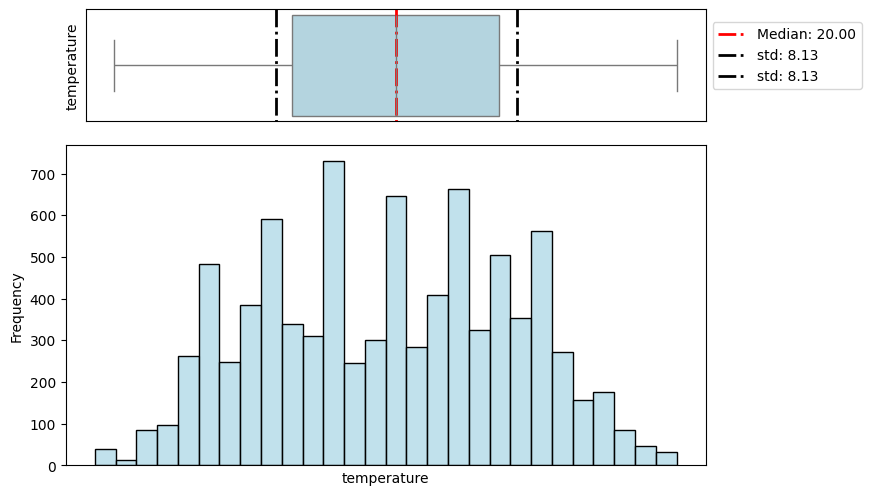

In [11]:
grafico_univariante(df2011,'temperature')

kurtosis: -0.88
simetria: -0.08
La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.
La distribución es asimétrica negativa (sesgo hacia la izquierda).


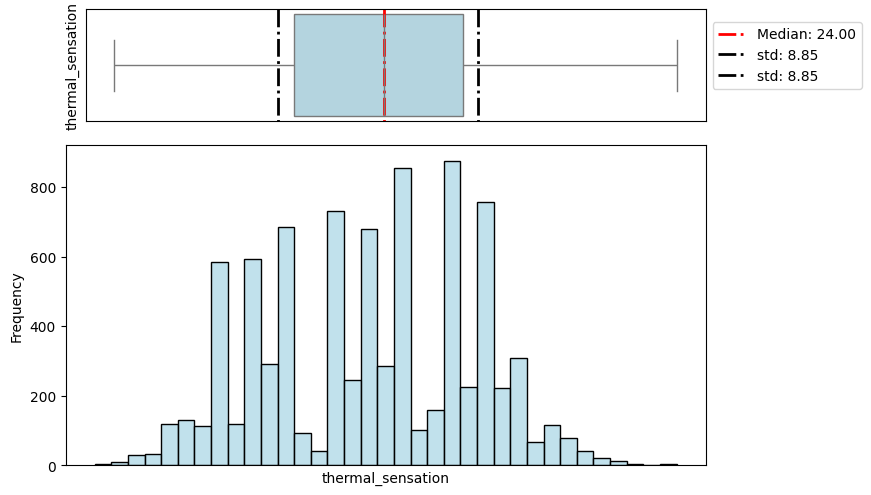

In [12]:
grafico_univariante(df2011,'thermal_sensation')

kurtosis: 0.57
simetria: 0.55
La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.
La distribución es asimétrica positiva (sesgo hacia la derecha).


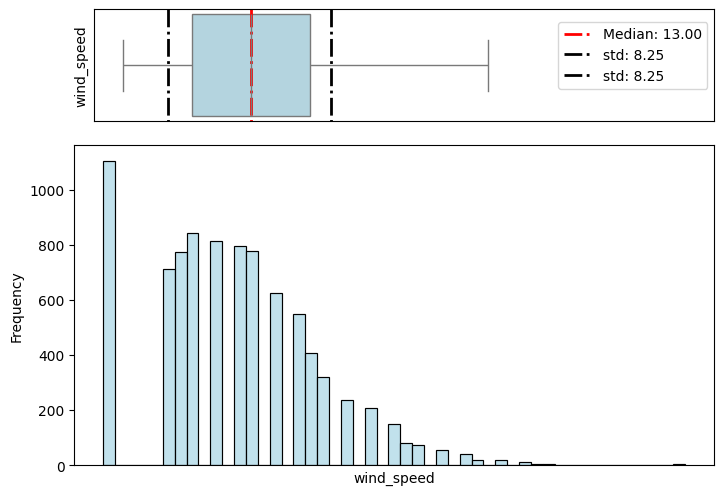

In [13]:
grafico_univariante(df2011,'wind_speed')

kurtosis: 6.45
simetria: 2.36
La distribución es leptocúrtica, lo que sugiere colas pesadas y picos agudos.
La distribución es asimétrica positiva (sesgo hacia la derecha).


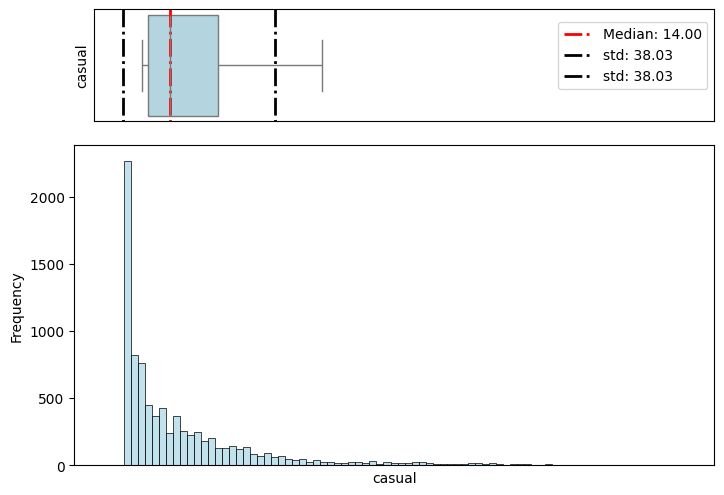

In [14]:
grafico_univariante(df2011,'casual')

kurtosis: 2.19
simetria: 1.46
La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.
La distribución es asimétrica positiva (sesgo hacia la derecha).


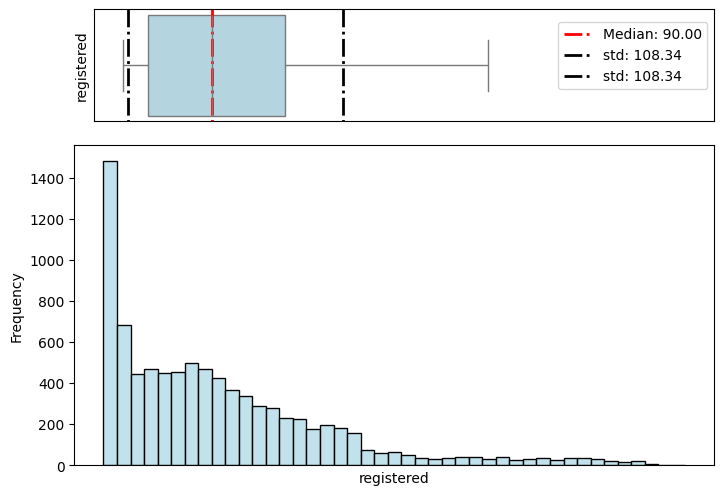

In [15]:
grafico_univariante(df2011,'registered')

kurtosis: 0.93
simetria: 1.15
La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.
La distribución es asimétrica positiva (sesgo hacia la derecha).


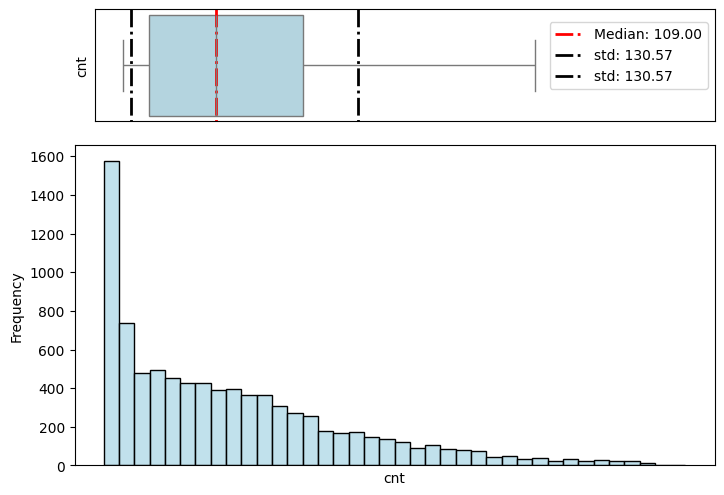

In [16]:
grafico_univariante(df2011,'cnt')

#### Análisis bivariante

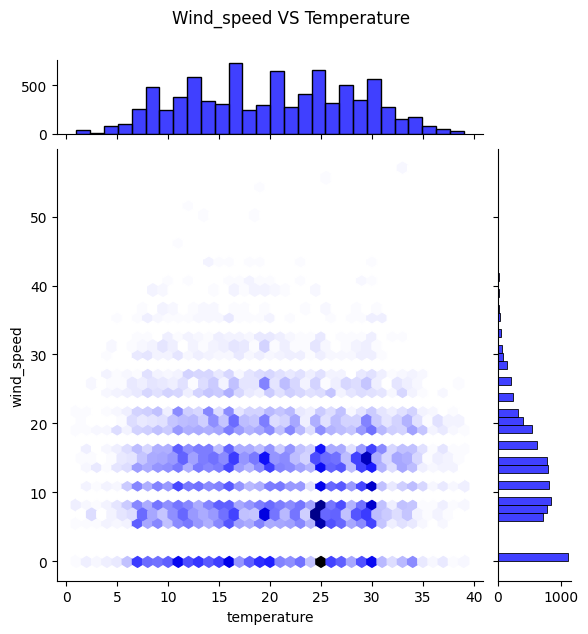

In [17]:
grafico_bivariante(df=df2011,x='temperature',y='wind_speed',forma='hex', title='Wind_speed VS Temperature')

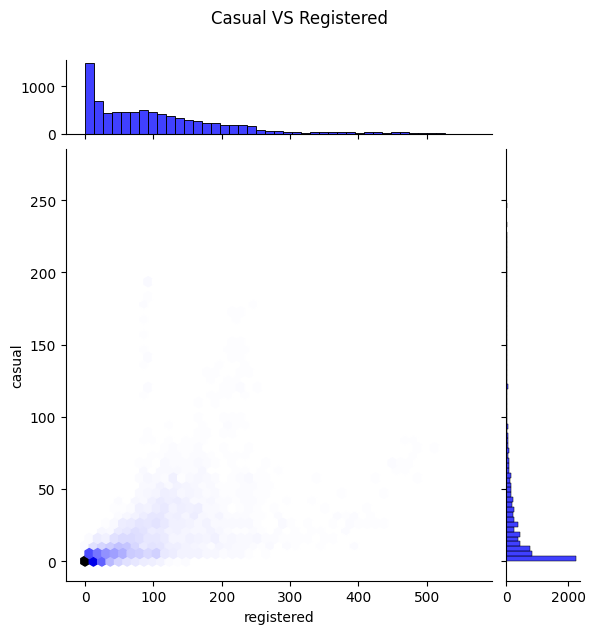

In [18]:
grafico_bivariante(df=df2011,x='registered',y='casual',forma='hex',title='Casual VS Registered')

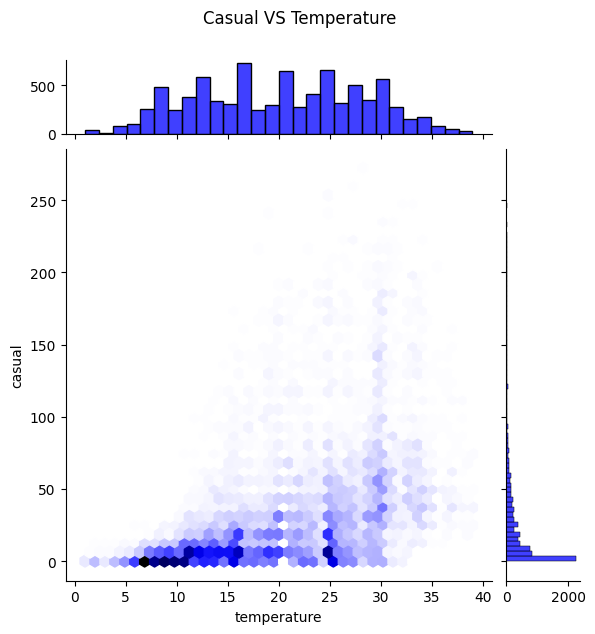

In [19]:
grafico_bivariante(df=df2011,x='temperature',y='casual',forma='hex', title='Casual VS Temperature')

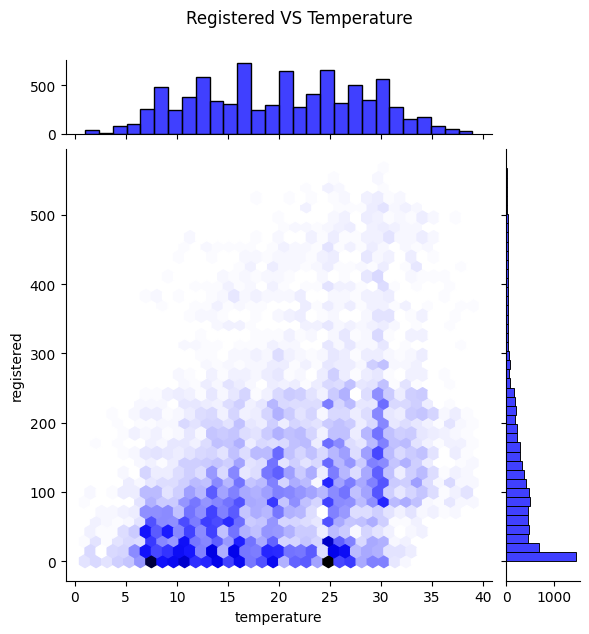

In [20]:
grafico_bivariante(df=df2011,x='temperature',y='registered',forma='hex', title='Registered VS Temperature')

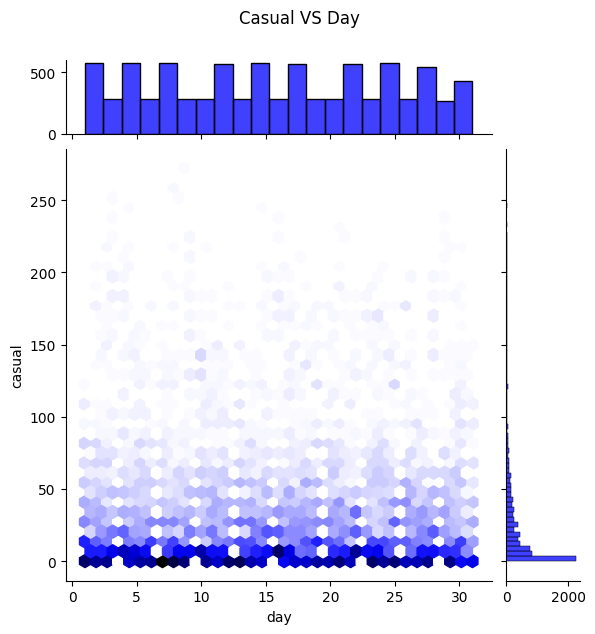

In [21]:
grafico_bivariante(df=df2011,x='day',y='casual',forma='hex', title='Casual VS Day')

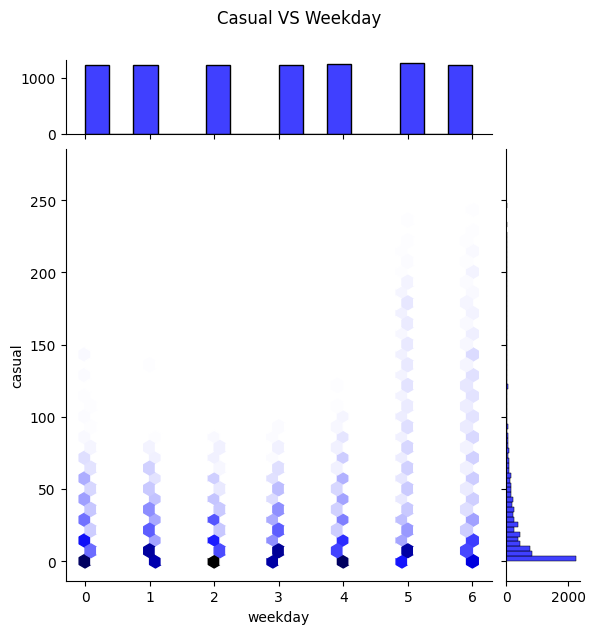

In [22]:
grafico_bivariante(df=df2011,x='weekday',y='casual',forma='hex', title='Casual VS Weekday')

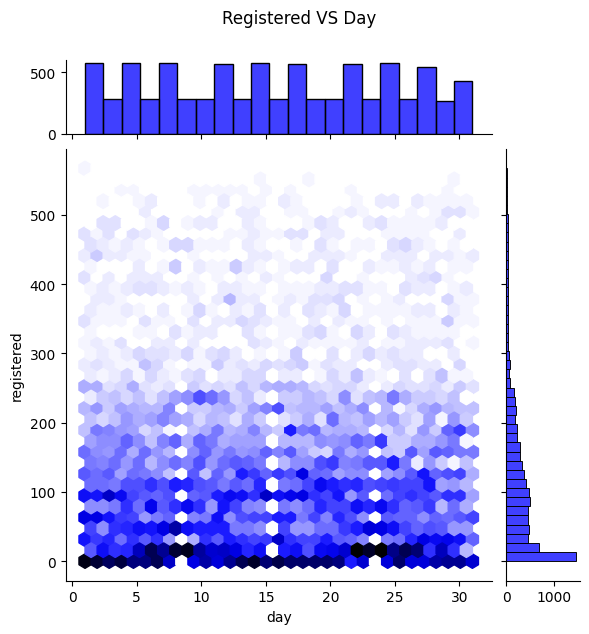

In [23]:
grafico_bivariante(df=df2011,x='day',y='registered',forma='hex', title='Registered VS Day')

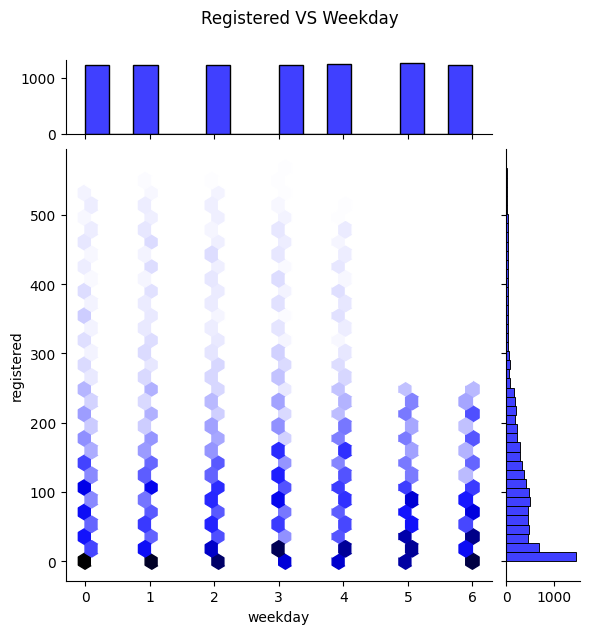

In [24]:
grafico_bivariante(df=df2011,x='weekday',y='registered',forma='hex', title='Registered VS Weekday')

#### Análisis multivariante

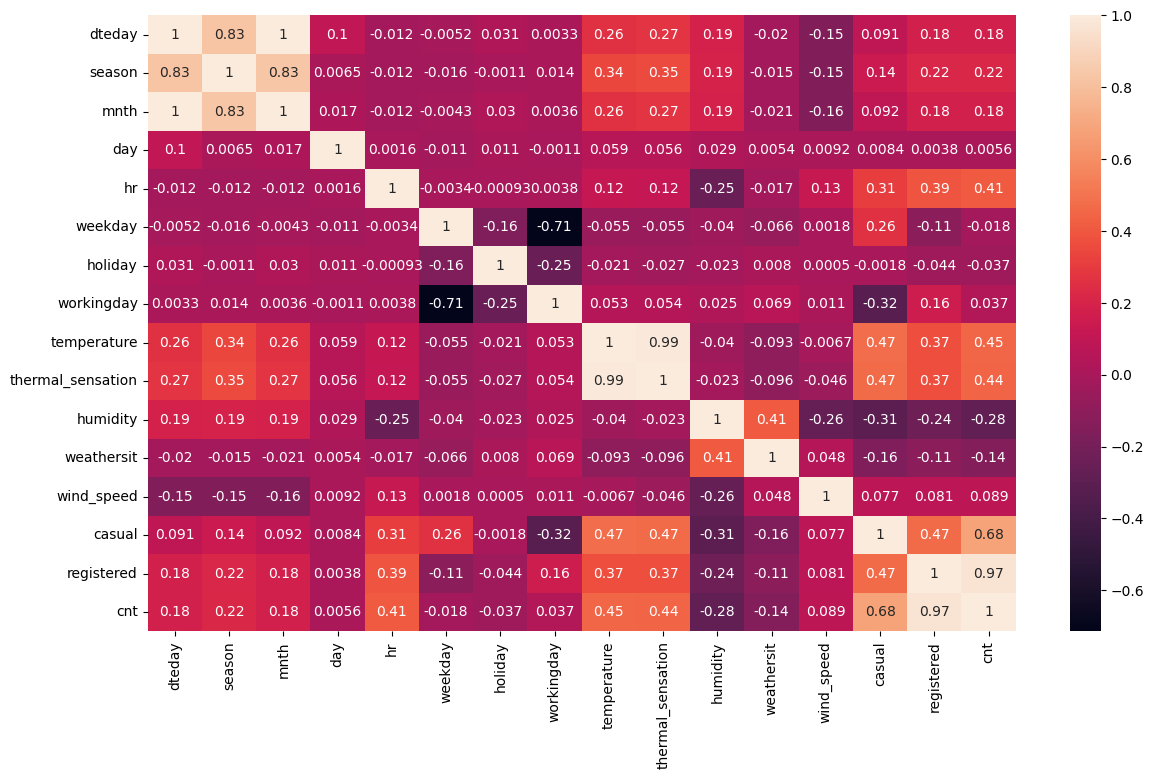

In [25]:
plt.figure(figsize=(14,8))
sns.heatmap(df2011.select_dtypes(exclude=['object']).corr(), annot=True);

*****

### Hipótesis

#### **1**: Existe una diferencia significativa en el uso promedio de bicicletas entre estaciones cálidas (primavera y verano) y estaciones frías (invierno y otoño).


In [26]:
df2011['seasonteam'] = df2011['season'].replace({1:'frio',2:'calido',3:'calido',4:'frio'})
df2011

,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt,seasonteam
instant,,,,,,,,,,,,,,,,,
1,2011-01-01,1,1,1,0,5,0,0,10.0,14.0,81.0,1,0.0,3,13,16,frio
2,2011-01-01,1,1,1,1,5,0,0,9.0,14.0,80.0,1,0.0,8,32,40,frio
3,2011-01-01,1,1,1,2,5,0,0,9.0,14.0,80.0,1,0.0,5,27,32,frio
4,2011-01-01,1,1,1,3,5,0,0,10.0,14.0,75.0,1,0.0,3,10,13,frio
5,2011-01-01,1,1,1,4,5,0,0,10.0,14.0,75.0,1,0.0,0,1,1,frio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,2011-12-31,1,12,31,19,5,0,0,17.0,21.0,54.0,1,15.0,19,73,92,frio
8642,2011-12-31,1,12,31,20,5,0,0,17.0,21.0,54.0,1,15.0,8,63,71,frio
8643,2011-12-31,1,12,31,21,5,0,0,16.0,20.0,58.0,1,13.0,2,50,52,frio


In [27]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['cnt'][df2011['seasonteam'] == 'frio'],
                                    df2011['cnt'][df2011['seasonteam'] == 'calido'])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre estaciones frías y cálidas.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre las estaciones frías y cálidas.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre estaciones frías y cálidas")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre estaciones frías y cálidas")


Prueba de Mann-Whitney para dos muestras independientes: stat = 7055687.0, p_value = 5.6952632351608595e-86
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre estaciones frías y cálidas


In [28]:
dfH1 = df2011.groupby('season')[['cnt']].mean().reset_index()
dfH1

,season,cnt
0,1,72.533849
1,2,154.899228
2,3,183.890179
3,4,150.181350


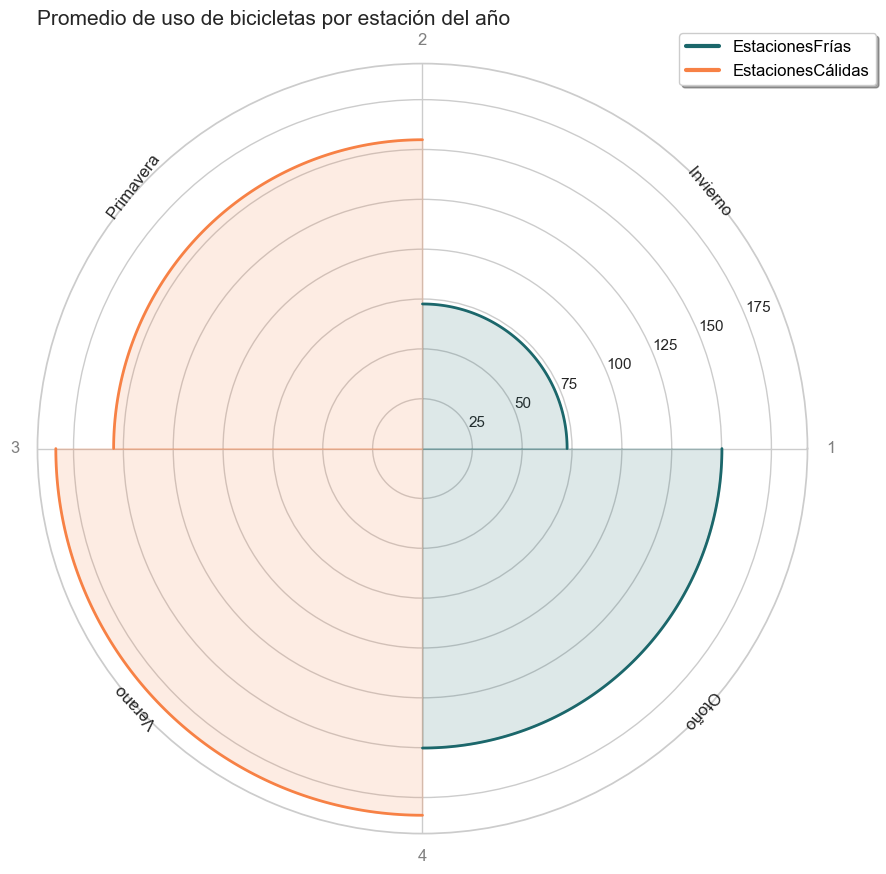

In [56]:
from scipy.interpolate import interp1d
from matplotlib.lines import Line2D

season = [1,2,3,4]

valores = [cant for cant in dfH1["cnt"]]
N = len(season)

angulos = [n / float(N) * 2 * np.pi for n in range(N)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10),
                       subplot_kw=dict(polar=True))

plt.xticks(angulos, season, color='grey', size=12)

legend_lines = [] 
season2 = ['Invierno','Primavera','Verano','Otoño']
colores = ['#1b676b', '#f78145', '#f78145','#1b676b']
x = ['left','right', 'right', 'left']
r = [-50, 53, 133, 230]

# Agregar el primer ángulo al final para cerrar el círculo
angulos += [angulos[0]]

for i in range(N):
    start_angle = angulos[i]
    end_angle = angulos[i + 1]

    # Asegurar que el ángulo final no sea menor que el ángulo inicial para la última estación
    if end_angle < start_angle:
        end_angle += 2 * np.pi

    # Interpolación para suavizar las líneas
    interp_points = 100  # Número de puntos para la interpolación
    interp_angles = np.linspace(start_angle, end_angle, interp_points)
    interp_values = np.linspace(valores[i], valores[i], interp_points)

    # Rellenar el área bajo la curva
    ax.fill_between(interp_angles, 0, interp_values, color=colores[i], alpha=0.15)

    # Graficar la línea suavizada
    line, = plt.plot(interp_angles, interp_values, linewidth=2, linestyle='solid', color=colores[i], solid_capstyle='round')

    legend_lines.append(Line2D([0], [0], color=colores[i], linewidth=3, linestyle='solid'))
    
    # Etiquetas en las diagonales
    angle_mid = (start_angle + end_angle) / 2
    ax.text(angle_mid, max(valores), f" {season2[i]}", ha=x[i], va='center', rotation=r[i], fontsize='medium')

# legend y title
plt.legend(legend_lines, [f'Estaciones{s}' for s in ['Frías','Cálidas']], loc='best', bbox_to_anchor=(1.10, 1.05), fontsize='medium', shadow=True, labelcolor='black')

plt.title('Promedio de uso de bicicletas por estación del año', fontsize='15', fontweight='15', loc='left');


### *Highlights sobre el promedio de uso de bicicletas entre las estaciones cálidas y frías:*

*Las **estaciones cálidas** presentan un mayor uso del sistema a nivel promedio que las **estaciones frías**.*

#### **2**: Existe una diferencia en el promedio de uso entre las estaciones cálidas.

In [30]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['cnt'][df2011['season'] == 2],
                                    df2011['cnt'][df2011['season'] == 3])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre las estaciones primavera y verano.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano")


Prueba de Mann-Whitney para dos muestras independientes: stat = 2177505.5, p_value = 1.1981821999042859e-11
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano


In [32]:
from scipy.stats import kruskal

# Dividir los datos en grupos según la estación
grupo2 = df2011[df2011['season'] == 2]['season']
grupo3 = df2011[df2011['season'] == 3]['season']

# Realizar la prueba de Kruskal-Wallis
estadistico, p_valor = kruskal(grupo2, grupo3)

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre las estaciones primavera y verano.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano.

# Imprimir resultados
print(f"Estadístico de prueba de Kruskal-Wallis: { estadistico} Valor p:{p_valor}")

# Interpretar el resultado
if p_valor < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano")


Estadístico de prueba de Kruskal-Wallis: 4442.000000000001
Valor p: 0.0
Hay una diferencia significativa entre las estaciones.


In [33]:
dfH2 = df2011.query('season == 2 or season == 3').groupby(['season','mnth'])['cnt'].mean().reset_index()
dfH2

,season,mnth,cnt
0,2,3,87.842308
1,2,4,130.927677
2,2,5,178.643817
3,2,6,190.325000
4,3,6,203.579167
5,3,7,185.811828
6,3,8,184.481532
7,3,9,171.342857


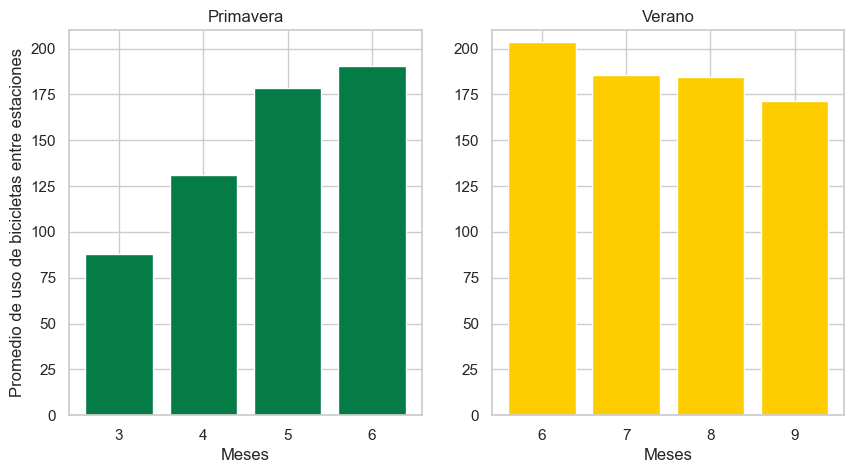

In [58]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
x = dfH2.query('season == 2')['mnth']
y = dfH2.query('season == 2')['cnt']
axs[0].bar(x,y,color='#057c46')
axs[0].set_title('Primavera')

axs[0].set_xlabel('Meses')
axs[0].set_ylabel('Promedio de uso de bicicletas entre estaciones');

x1 = dfH2.query('season == 3')['mnth']
y1 = dfH2.query('season == 3')['cnt']
axs[1].bar(x1,y1,color='#FFCC00')
axs[1].set_title('Verano');

axs[1].set_xlabel('Meses');

y_min = 0  # establecer el límite mínimo deseado
y_max = 210  # establecer el límite máximo deseado
axs[0].set_ylim(y_min, y_max)
axs[1].set_ylim(y_min, y_max);

### *Highlights sobre el promedio de uso de bicicletas entre las estaciones cálidas:*

*Dentro de las **estaciones cálidas** presentan un mayor uso del sistema a nivel promedio la **temporada de verano**.*

#### **3**: Existe una diferencia en el promedio de uso entre las estaciones frías.

In [35]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['cnt'][df2011['season'] == 1],
                                    df2011['cnt'][df2011['season'] == 4])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre las estaciones invierno y otoño.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre las estaciones invierno y otoño.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones invierno y otoño")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre las estaciones invierno y otoño")


Prueba de Mann-Whitney para dos muestras independientes: stat = 1414419.0, p_value = 2.749353817849615e-90
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones inivierno y otoño


In [36]:
dfH3_1 = df2011.query('season == 1').groupby('mnth')['cnt'].mean().reset_index()
dfH3_2 = df2011.query('season == 4').groupby('mnth')['cnt'].mean().reset_index()

def desplazar_elementos(lista):
    # Guardar el último elemento en una variable temporal
    temp = lista[-1]
    # Desplazar los elementos hacia la derecha
    for i in range(len(lista)-1, 0, -1):
        lista[i] = lista[i-1]
        
    # Colocar el último elemento en la primera posición
    lista[0] = temp
    return lista

# Llamar a la función para desplazar los elementos
dfH3_1['mnth'] = desplazar_elementos(pd.Categorical(dfH3_1['mnth'], ordered=True))
dfH3_1['cnt'] = desplazar_elementos(list(dfH3_1['cnt']))

print(dfH3_1)
print(dfH3_2)

  mnth        cnt
0   12  85.785441
1    1  55.507267
2    2  74.291217
3    3  87.672340
   mnth         cnt
0     9  176.052083
1    10  163.277254
2    11  140.671766
3    12  133.806250


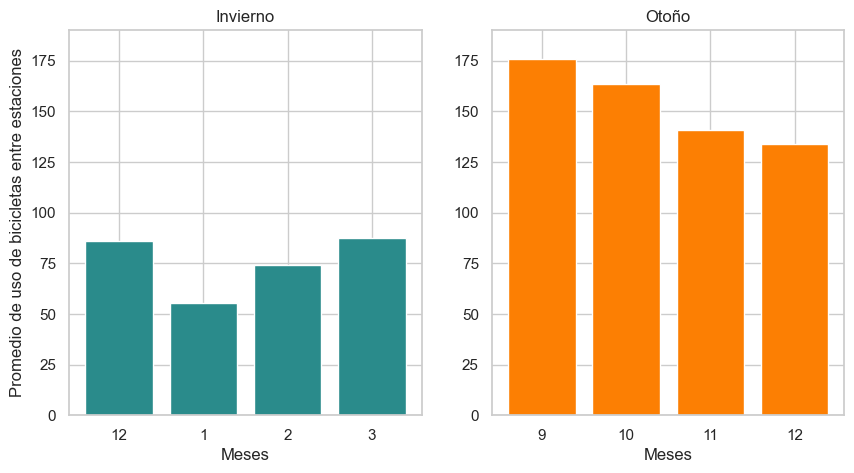

In [65]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

x = dfH3_1['mnth']
y = dfH3_1['cnt']

axs[0].bar(range(len(x)), y, color='#2a8b8b')
axs[0].set_title('Invierno')
axs[0].set_xlabel('Meses')
axs[0].set_ylabel('Promedio de uso de bicicletas entre estaciones')
axs[0].set_xticks(range(len(x)))
axs[0].set_xticklabels(x)


x1 = dfH3_2['mnth']
y1 = dfH3_2['cnt']
axs[1].bar(x1, y1, color='#fc7f03')
axs[1].set_title('Otoño');

axs[1].set_xlabel('Meses');

y_min = 0  # establecer el límite mínimo deseado
y_max = 190  # establecer el límite máximo deseado
axs[0].set_ylim(y_min, y_max)
axs[1].set_ylim(y_min, y_max);

### *Highlights sobre el promedio de uso de bicicletas entre las estaciones frías:*

*Dentro de las **estaciones frías** presentan un menor uso del sistema a nivel promedio la **temporada de invierno**.*

#### **4**: ¿Cómo se manifiesta el comportamiento por tipo de clientes durante la temporada de mayor actividad?

ver lo de prueba de Friedman

In [38]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['casual'][df2011['season'] == 3],
                                    df2011['registered'][df2011['season'] == 3])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre clientes casuales y registrados durante la estación de verano.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de verano.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de verano.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de verano.")


Prueba de Mann-Whitney para dos muestras independientes: stat = 1096022.5, p_value = 1.1096330493504006e-233
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de verano.


In [39]:
dfH4 = df2011.query('season == 3').groupby('mnth').agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
dfH4

,mnth,casual,registered
0,6,42.970833,160.608333
1,7,45.807796,140.004032
2,8,39.231190,145.250342
3,9,37.529524,133.813333


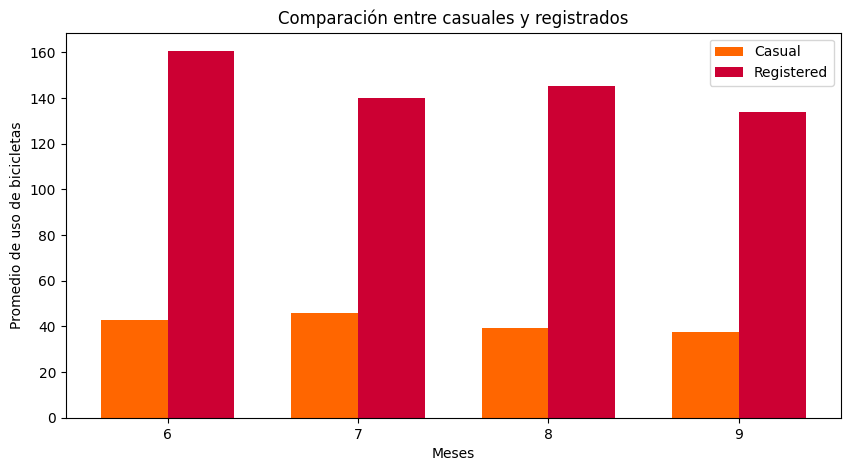

In [40]:
fig = plt.figure(figsize=(10,5))

columna1_data = dfH4['casual']
columna2_data = dfH4['registered']

# Obtén las posiciones de las barras
posiciones = range(len(dfH4))

# Configura el ancho de las barras
ancho_barra = 0.35

# Crea el gráfico de barras
plt.bar(posiciones, columna1_data, width=ancho_barra, label='Casual', color='#FF6600')
plt.bar([pos + ancho_barra for pos in posiciones], columna2_data, width=ancho_barra, label='Registered', color='#CC0033')

# Configura las etiquetas y la leyenda
plt.xlabel('Meses')
plt.ylabel('Promedio de uso de bicicletas')
plt.title('Comparación entre casuales y registrados en verano')
plt.xticks([pos + ancho_barra / 2 for pos in posiciones], dfH4['mnth'])
plt.legend()

# Muestra el gráfico
plt.show()

### *Highlights sobre el comportamiento de clientes en promedio durante el verano:*

*Dentro de la **temporada de verano** presentan un mayor uso del sistema a nivel promedio la **los clientes registrados** llegando al máximo durante el mes de Junio.*

#### **5**:¿Cómo se refleja el comportamiento por tipo de clientes durante la temporada de menor actividad?

In [41]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['casual'][df2011['season'] == 1],
                                    df2011['registered'][df2011['season'] == 1])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre clientes casuales y registrados durante la estación de invierno.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de invierno.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de invierno.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de invierno.")


Prueba de Mann-Whitney para dos muestras independientes: stat = 636154.0, p_value = 0.0
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de invierno.


In [42]:
dfH5 = df2011.query('season == 1').groupby('mnth').agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
dfH5

,mnth,casual,registered
0,1,4.466570,51.040698
1,2,9.617874,64.673344
2,3,19.057447,68.614894
3,12,12.080460,73.704981


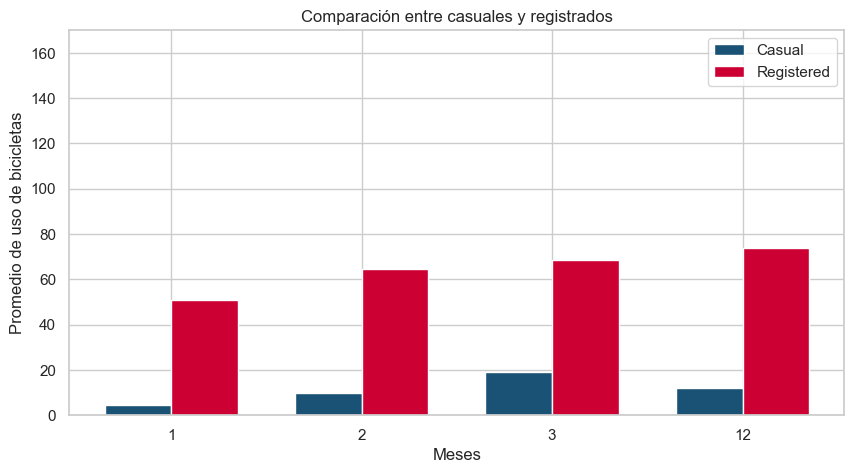

In [68]:
fig = plt.figure(figsize=(10,5))

columna1_data = dfH5['casual']
columna2_data = dfH5['registered']

# Obtén las posiciones de las barras
posiciones = range(len(dfH5))

# Configura el ancho de las barras
ancho_barra = 0.35

# Crea el gráfico de barras
plt.bar(posiciones, columna1_data, width=ancho_barra, label='Casual', color='#1A5276')
plt.bar([pos + ancho_barra for pos in posiciones], columna2_data, width=ancho_barra, label='Registered', color='#CC0033')

plt.xticks([pos + ancho_barra / 2 for pos in posiciones], dfH5['mnth'])
plt.ylim(0,170)

# Configura las etiquetas y la leyenda
plt.xlabel('Meses')
plt.ylabel('Promedio de uso de bicicletas en invierno')
plt.title('Comparación entre casuales y registrados')
plt.legend()

plt.show()

### *Highlights sobre el comportamiento de clientes en promedio durante el invierno:*

*Dentro de la **temporada de invierno** presentan un menor uso del sistema a nivel promedio **los clientes casuales** llegando al mínimo durante el mes de enero.*

#### **6**: ¿Cómo varía el uso promedio de bicicletas mensualmente durante la temporada de mayor actividad?

In [44]:
dfH6 = df2011.query('season == 3').groupby(['day', 'mnth']).agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
dfH6

,day,mnth,casual,registered
0,1,7,51.916667,171.500000
1,1,8,30.375000,147.375000
2,1,9,32.625000,180.500000
3,2,7,91.833333,121.458333
4,2,8,33.375000,168.500000
...,...,...,...,...
89,30,6,42.791667,187.000000
90,30,7,64.958333,121.500000
91,30,8,32.291667,184.541667
92,31,7,63.500000,115.750000


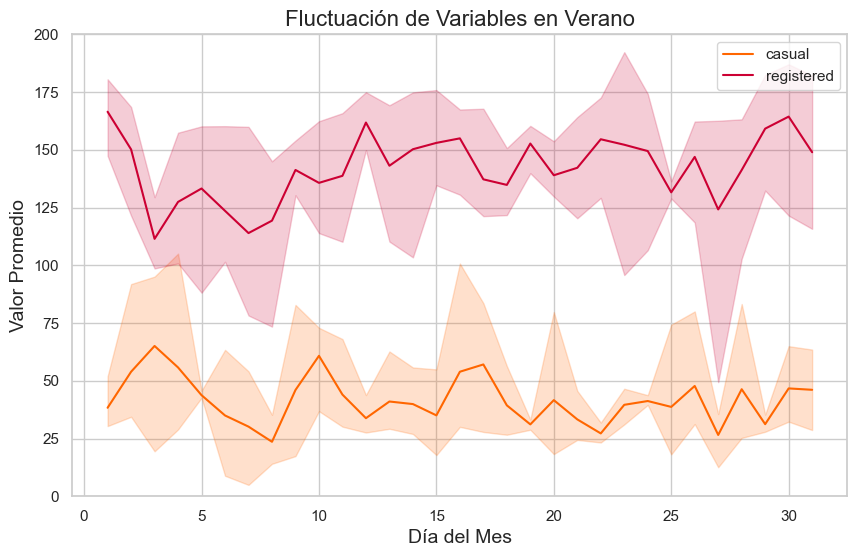

In [69]:
sns.set(style="whitegrid")
# Crear el lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='casual', data=dfH6, label='casual', color='#FF6600')
sns.lineplot(x='day', y='registered', data=dfH6, label='registered', color='#CC0033')

# Configurar el título y las etiquetas de los ejes
plt.title('Fluctuación de Variables en Verano', fontsize=16)
plt.xlabel('Día del Mes', fontsize=14)
plt.ylabel('Valor Promedio', fontsize=14)

# Mostrar la leyenda
plt.legend()

plt.ylim(0, 200)
# Mostrar el gráfico
plt.show()

### *Highlights sobre el comportamiento de clientes en promedio durante los días del mes en verano:*

*Dentro de la **temporada de verano** presentan un mayor uso del sistema a nivel promedio **los clientes registrados** .*

#### **7**: ¿Cómo varía el uso promedio de bicicletas mensualmente durante la temporada de menor actividad?

In [46]:
dfH7 = df2011.query('season == 1').groupby(['day', 'mnth']).agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
dfH7

,day,mnth,casual,registered
0,1,1,13.791667,27.250000
1,1,2,2.043478,57.086957
2,1,3,5.708333,71.416667
3,2,1,5.695652,29.130435
4,2,2,3.000000,60.583333
...,...,...,...,...
85,29,12,10.583333,90.375000
86,30,1,6.086957,41.565217
87,30,12,20.458333,104.500000
88,31,1,1.750000,60.791667


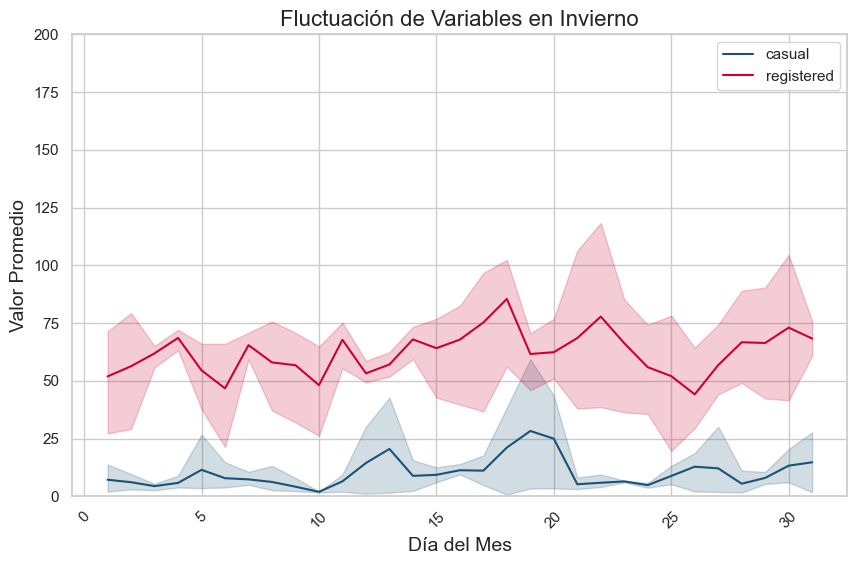

In [47]:
sns.set(style="whitegrid")
# Crear el lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='casual', data=dfH7, label='casual', color='#1A5276')
sns.lineplot(x='day', y='registered', data=dfH7, label='registered', color='#CC0033')

# Configurar el título y las etiquetas de los ejes
plt.title('Fluctuación de Variables en Invierno', fontsize=16)
plt.xlabel('Día del Mes', fontsize=14)
plt.ylabel('Valor Promedio', fontsize=14)

# Mostrar la leyenda
plt.legend()
# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)
plt.ylim(0, 200)

# Mostrar el gráfico
plt.show()

### *Highlights sobre el comportamiento de clientes en promedio durante los días del mes en invierno:*

*Dentro de la **temporada de invierno** presentan un menor uso del sistema a nivel promedio **los clientes casuales**.*

#### **8**: ¿Cómo se comporta el uso promedio de bicicletas por tipo de clientes durante los días de la semana de nuestra temporada de mayor frecuencia?

In [48]:
dfH8 = df2011.query('season == 3').groupby(['weekday']).agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
dfH8.replace({0 : 'Lunes', 1 : 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6:'Domingo'}, inplace=True)
dfH8

,weekday,casual,registered
0,Lunes,32.376206,146.237942
1,Martes,30.940299,159.382090
2,Miércoles,27.976190,156.726190
3,Jueves,27.632836,152.310448
4,Viernes,35.673077,152.724359
5,Sábado,69.352941,114.320261
6,Domingo,69.940984,111.311475


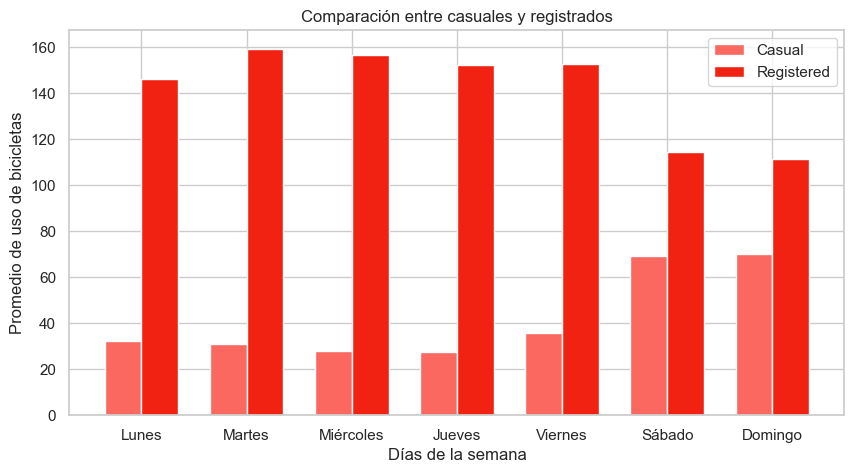

In [53]:
fig = plt.figure(figsize=(10,5))

columna1_data = dfH8['casual']
columna2_data = dfH8['registered']

# Obtén las posiciones de las barras
posiciones = range(len(dfH8))

# Configura el ancho de las barras
ancho_barra = 0.35

# Crea el gráfico de barras
plt.bar(posiciones, columna1_data, width=ancho_barra, label='Casual', color='#fa685f')
plt.bar([pos + ancho_barra for pos in posiciones], columna2_data, width=ancho_barra, label='Registered', color='#f22213')

# Configura las etiquetas y la leyenda
plt.xlabel('Días de la semana')
plt.ylabel('Promedio de uso de bicicletas en verano')
plt.title('Comparación entre casuales y registrados')
plt.xticks([pos + ancho_barra / 2 for pos in posiciones], dfH8['weekday'])
plt.legend()
plt.ylim(0, 170)
# Muestra el gráfico
plt.show()

### *Highlights sobre el comportamiento de clientes en promedio durante los días de la semana en verano:*

*Dentro de la **temporada de verano** presentan un comportamiento mayor a nivel promedio **los clientes casuales** durante los fines de semana, mientras que **los clientes registrados** los días hábiles de la semana.*

#### **9**: ¿Cómo se comporta el uso promedio de bicicletas por tipo de clientes durante los días de la semana de nuestra temporada de mayor frecuencia?

In [50]:
dfH9 = df2011.query('season == 1').groupby(['weekday']).agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
dfH9.replace({0 : 'Lunes', 1 : 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6:'Domingo'}, inplace=True)
dfH9

,weekday,casual,registered
0,Lunes,7.296429,56.989286
1,Martes,5.764259,65.908745
2,Miércoles,6.122034,72.725424
3,Jueves,6.086207,74.200000
4,Viernes,10.726073,74.590759
5,Sábado,17.332335,49.056886
6,Domingo,17.346535,43.980198


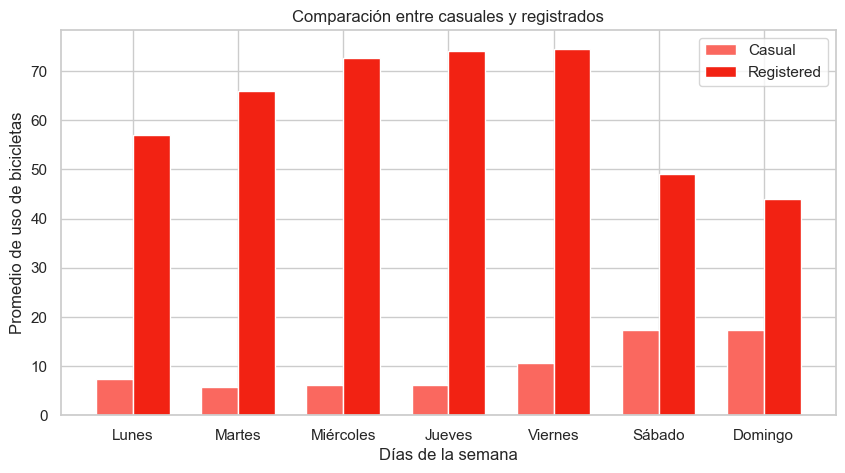

In [54]:
fig = plt.figure(figsize=(10,5))

columna1_data = dfH9['casual']
columna2_data = dfH9['registered']

# Obtén las posiciones de las barras
posiciones = range(len(dfH9))

# Configura el ancho de las barras
ancho_barra = 0.35

# Crea el gráfico de barras
plt.bar(posiciones, columna1_data, width=ancho_barra, label='Casual', color='#fa685f')
plt.bar([pos + ancho_barra for pos in posiciones], columna2_data, width=ancho_barra, label='Registered', color='#F22213')

# Configura las etiquetas y la leyenda
plt.xlabel('Días de la semana')
plt.ylabel('Promedio de uso de bicicletas')
plt.title('Comparación entre casuales y registrados en invierno')
plt.xticks([pos + ancho_barra / 2 for pos in posiciones], dfH9['weekday'])
plt.legend()

plt.ylim(0, 170)
# Muestra el gráfico
plt.show()


### *Highlights sobre el comportamiento de clientes en promedio durante los días de la semana en invierno:*

*Dentro de la **temporada de invierno** presentan un comportamiento mayor a nivel promedio **los clientes casuales** durante los fines de semana, mientras que **los clientes registrados** los días hábiles de la semana.*

Comienza mi otro análisis, en los casuales y registrados, contados con outliers muy marcados. La pregunta para imputar aquellos sería en base al día, porque si corresponde a fin de semana pero de registrados 500 por ejemplo podemos ver que no es del todo correcto, ya que, los fines de semana se espera una caía de estos